In [1]:
from pathlib import Path
import os
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import matplotlib.pyplot as plt
from common.helpers import visualize

labels = os.listdir(r"data\train")
dataset_path = Path(r"data\train")

In [28]:
# STEP 2: Create an FaceDetector object.
base_options = python.BaseOptions(model_asset_path=os.path.join('models', 'blaze_face_short_range.tflite'))
options = vision.FaceDetectorOptions(base_options=base_options)
detector = vision.FaceDetector.create_from_options(options)


def get_mouth_from_images():
    yawn_images = []
    annotated_images = []
    IMG_SIZE = 145
    categories = ["no_yawn", "yawn"]
    for index, category in enumerate(categories):
        path_link = os.path.join(dataset_path, category)
        
        for image in os.listdir(path_link):
            image = mp.Image.create_from_file(os.path.join(path_link, image))
            detection_result = detector.detect(image)
            
            # STEP 5: Process the detection result. In this case, visualize it.
            image_copy = np.copy(image.numpy_view())
            annotated_image, roi = visualize(image_copy, detection_result, keyponits=[3])
            yawn_images.append([image_copy[roi[0][0][1]: roi[0][1][1], roi[0][0][0]: roi[0][1][0]], index])
            annotated_images.append(annotated_image)
    return yawn_images, annotated_images

In [29]:
yawn_images, annotated_images = get_mouth_from_images()

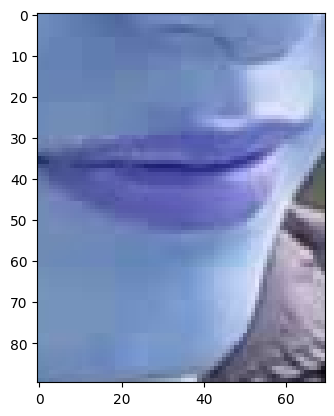

In [30]:
rgb_annotated_image = cv2.cvtColor(yawn_images[0][0], cv2.COLOR_BGR2RGB)
plt.imshow(rgb_annotated_image)

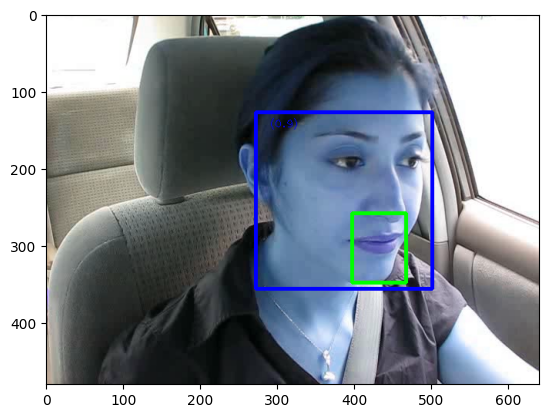

In [31]:
rgb_annotated_image = cv2.cvtColor(annotated_images[0], cv2.COLOR_BGR2RGB)
plt.imshow(rgb_annotated_image)

# Testing:

In [ ]:


haar_path = os.path.join('models', 'haar')
data_path = os.path.join('data', 'train')
labels = os.listdir(data_path)

import os

# STEP 2: Create an FaceDetector object.
base_options = python.BaseOptions(model_asset_path=os.path.join('models', 'blaze_face_short_range.tflite'))
options = vision.FaceDetectorOptions(base_options=base_options)
detector = vision.FaceDetector.create_from_options(options)

IMAGE_FILE = os.path.join(data_path, "yawn", "6.jpg")
# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect faces in the input image.
detection_result = detector.detect(image)

In [8]:
from common.helpers import visualize

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image, detection = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
detection.keypoints

[NormalizedKeypoint(x=0.4321437180042267, y=0.4324796199798584, label='', score=0.0),
 NormalizedKeypoint(x=0.5396085381507874, y=0.4296240210533142, label='', score=0.0),
 NormalizedKeypoint(x=0.48219016194343567, y=0.5001121163368225, label='', score=0.0),
 NormalizedKeypoint(x=0.48382070660591125, y=0.575690507888794, label='', score=0.0),
 NormalizedKeypoint(x=0.37738099694252014, y=0.4794338345527649, label='', score=0.0),
 NormalizedKeypoint(x=0.60610431432724, y=0.4786100387573242, label='', score=0.0)]

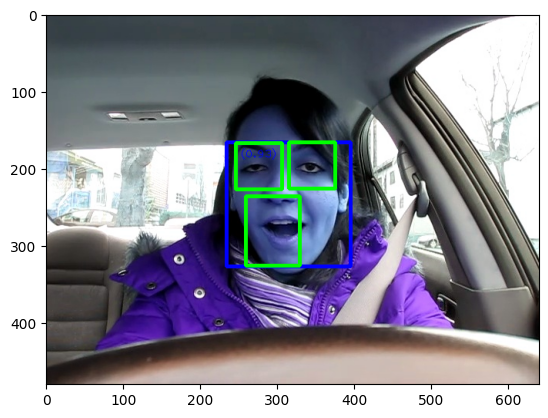

In [9]:
plt.imshow(rgb_annotated_image)